In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Dataset merupakan data Pima Indian Diabet dari Kaggle

In [ ]:
#Mengimport data
datmin = pd.read_csv('/content/diabetes.csv',sep=",")
datmin.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#EDA

In [ ]:
datmin.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
datmin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


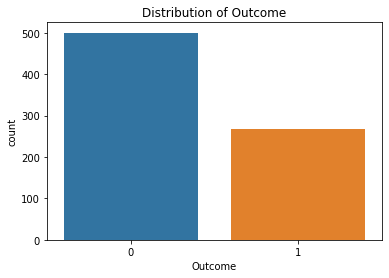

In [ ]:
sns.countplot(datmin['Outcome']).set_title('Distribution of Outcome')
plt.show()

# Skewness

In [ ]:
datatr=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
datmin[datatr].skew(axis=0, skipna=True)

Glucose          0.530989
BloodPressure    0.134153
SkinThickness    0.690619
Insulin          2.166464
BMI              0.593970
dtype: float64

In [ ]:
df1=datmin.loc[datmin['Outcome']==0]
df2=datmin.loc[datmin['Outcome']==1]

In [ ]:
df1[datatr].skew(axis=0, skipna=True)

Glucose          0.654938
BloodPressure    0.161298
SkinThickness    0.358207
Insulin          2.512829
BMI              0.469779
dtype: float64

In [ ]:
df2[datatr].skew(axis=0, skipna=True)

Glucose          0.090633
BloodPressure    0.077426
SkinThickness    1.427105
Insulin          1.886631
BMI              1.020176
dtype: float64

In [ ]:
df1[datatr].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,497.000000,481.000000,361.000000,264.000000,491.000000
mean,110.643863,70.877339,27.235457,130.287879,30.859674
std,24.776906,12.161223,10.026491,102.482237,6.560737
min,44.000000,24.000000,7.000000,15.000000,18.200000
25%,93.000000,62.000000,19.000000,66.000000,25.600000
50%,107.000000,70.000000,27.000000,102.500000,30.100000
75%,125.000000,78.000000,33.000000,161.250000,35.300000
max,197.000000,122.000000,60.000000,744.000000,57.300000


In [ ]:
df2[datatr].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,266.000000,252.000000,180.000000,130.000000,266.000000
mean,142.319549,75.321429,33.000000,206.846154,35.406767
std,29.599199,12.299866,10.327595,132.699898,6.614982
min,78.000000,30.000000,7.000000,14.000000,22.900000
25%,119.000000,68.000000,27.000000,127.500000,30.900000
50%,140.000000,74.500000,32.000000,169.500000,34.300000
75%,167.000000,84.000000,39.000000,239.250000,38.925000
max,199.000000,114.000000,99.000000,846.000000,67.100000


# **Preprocessing**

In [ ]:
#Mengidentifikasi nilai tak wajar sebagai missing value

datmin['Glucose']=datmin['Glucose'].replace(0,np.nan)
datmin['BloodPressure']=datmin['BloodPressure'].replace(0,np.nan)
datmin['SkinThickness']=datmin['SkinThickness'].replace(0,np.nan)
datmin['Insulin']=datmin['Insulin'].replace(0,np.nan)
datmin['BMI']=datmin['BMI'].replace(0,np.nan)
datmin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


##Missing Value

In [ ]:
#cek missing value
total=datmin.isnull().sum().sort_values(ascending = False)
print(total)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64


Sebelum melakukan imputasi pada nilai missing, dicek terlebih dahulu skewness dari data, untuk menentukan imputasi yang tepat

##Imputasi Missing Value


In [ ]:
#imputasi class mean pada attribute Glucose dan Insulin
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)
datmin2=df1.append(df2)
datmin2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,NaN,102.5,25.6,0.201,30,0
7,10,115.0,NaN,NaN,102.5,35.3,0.134,29,0
10,4,110.0,92.0,NaN,102.5,37.6,0.191,30,0


In [ ]:
#Imputasi Mean pada bloodpressure, skinthickness, dan BMI
mean1=datmin2['BloodPressure'].mean()
datmin2['BloodPressure'].fillna(mean1,inplace=True)
mean2=datmin2['SkinThickness'].mean()
datmin2['SkinThickness'].fillna(mean2,inplace=True)
mean3=datmin2['BMI'].mean()
datmin2['BMI'].fillna(mean3,inplace=True)

In [ ]:
datmin2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.697358,30.462008,44.000,99.75000,117.000000,141.00000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.00000,99.00
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.500000,169.50000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [ ]:
#Ckecking Missing Value
total=datmin2.isnull().sum().sort_values(ascending = False)
print(total)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64


##Outlier

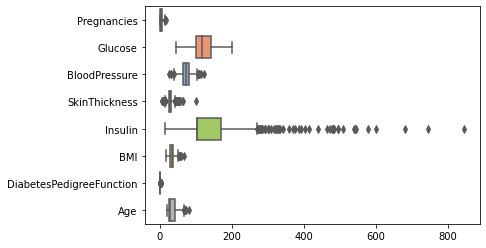

In [ ]:
#Cek outlier menggunakan boxplot
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(data=datmin2[datat], orient="h", palette="Set2")

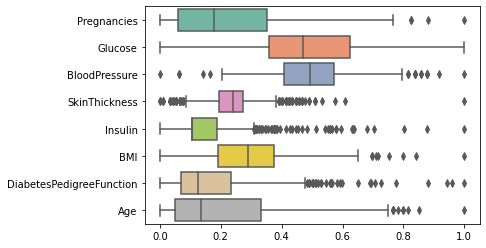

In [ ]:
ax = sns.boxplot(data=datscale[datat], orient="h", palette="Set2")

###Univariate

In [ ]:
#membuat fungsi deteksi outlier univariat
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Pregnancies'])
datmin2[(datmin2['Pregnancies'] < lowerbound) | (datmin2['Pregnancies'] > upperbound)].index

Int64Index([88, 159, 298, 455], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Glucose'])
datmin2[(datmin2['Glucose'] < lowerbound) | (datmin2['Glucose'] > upperbound)].index

Int64Index([], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['BloodPressure'])
datmin2[(datmin2['BloodPressure'] < lowerbound) | (datmin2['BloodPressure'] > upperbound)].index

Int64Index([18, 106, 362, 549, 597, 599, 658, 672, 43, 84, 125, 177, 662, 691], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['SkinThickness'])
datmin2[(datmin2['SkinThickness'] < lowerbound) | (datmin2['SkinThickness'] > upperbound)].index

Int64Index([ 32,  50,  55,  57,  68,  80,  86, 134, 150, 169, 191, 211, 252,
            273, 275, 279, 286, 289, 307, 313, 316, 320, 335, 340, 353, 374,
            382, 385, 392, 393, 422, 428, 432, 434, 446, 447, 450, 465, 466,
            519, 532, 548, 565, 575, 585, 591, 594, 609, 617, 625, 639, 657,
            665, 671, 698, 710, 718, 763,   8,  16,  39,  99, 120, 130, 155,
            177, 197, 198, 254, 293, 370, 375, 409, 444, 445, 458, 476, 539,
            579, 580, 595, 661, 662, 663, 689, 693, 753],
           dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Insulin'])
datmin2[(datmin2['Insulin'] < lowerbound) | (datmin2['Insulin'] > upperbound)].index

Int64Index([ 54, 139, 144, 153, 162, 228, 247, 248, 258, 279, 286, 364, 392,
            395, 412, 486, 519, 574, 608, 645, 707, 710, 713,   8,  13,  53,
             56, 111, 186, 199, 206, 215, 220, 231, 296, 360, 370, 375, 388,
            409, 415, 425, 480, 561, 584, 606, 612, 655, 695, 715, 753],
           dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['BMI'])
datmin2[(datmin2['BMI'] < lowerbound) | (datmin2['BMI'] > upperbound)].index

Int64Index([247, 673, 120, 125, 177, 193, 303, 445], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['DiabetesPedigreeFunction'])
datmin2[(datmin2['DiabetesPedigreeFunction'] < lowerbound) | (datmin2['DiabetesPedigreeFunction'] > upperbound)].index

Int64Index([ 12,  58, 147, 228, 330, 371, 383, 395, 534, 593, 621, 622,   4,
             39,  45, 100, 187, 218, 243, 245, 259, 292, 308, 370, 445, 606,
            618, 659, 661],
           dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Age'])
datmin2[(datmin2['Age'] < lowerbound) | (datmin2['Age'] > upperbound)].index

Int64Index([123, 453, 459, 489, 537, 674, 684, 363, 666], dtype='int64')

## Multivariate (Mahalanobis Distance)

In [ ]:
#mengambil data tanpa kolom target/outcome
datout2=datmin2[['Pregnancies','Glucose','BloodPressure',
                'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [ ]:
#mengetahui banyak data (n)
df=len(list(datout2.columns.values))

In [ ]:
#membuat fungsi mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [ ]:
datout2['mahala'] = mahalanobis(x=datout2, data=datout2)
datout2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,mahala
1,1,85.0,66.000000,29.00000,102.5,26.6,0.351,31,3.126052
3,1,89.0,66.000000,23.00000,94.0,28.1,0.167,21,2.700958
5,5,116.0,74.000000,29.15342,102.5,25.6,0.201,30,2.560786
7,10,115.0,72.405184,29.15342,102.5,35.3,0.134,29,7.210551
10,4,110.0,92.000000,29.15342,102.5,37.6,0.191,30,4.692316


In [ ]:
#membuat fungsi deteksi outlier MD
from scipy.stats import chi2
def MD_detectOutliers(MD,df):
    nilaichi=chi2.isf(0.01, df)
    outliers = []
    for i in range(len(MD)):
        if (MD[i] > nilaichi):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)


In [ ]:
outliers_indices = MD_detectOutliers(datout2['mahala'],df)

print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [  4   8  13  18  45  58 106 111 125 159 177 186 228 247 254 286 294 370
 409 445 453 459 487 519 537 579 584 655 673 691 695 753]



In [ ]:
len(outliers_indices)

32

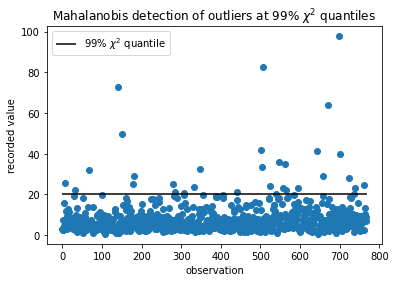

In [ ]:
d2=datout2['mahala']
eks = range( len( d2 ))

plt.subplot(111)

plt.scatter( eks, d2 )

plt.hlines( chi2.ppf(0.99, df), 0, len(d2), label ="99% $\chi^2$ quantile", linestyles = "solid" )  

plt.legend()
plt.ylabel("recorded value")
plt.xlabel("observation")
plt.title( 'Mahalanobis detection of outliers at 99% $\chi^2$ quantiles' )

plt.show()

## Imputasi Outlier (Lanjutan)

In [ ]:
out2=datmin2
lowerbound,upperbound = outlier_treatment(datmin2['Pregnancies'])
out2.loc[(out2['Pregnancies'] < lowerbound) | (out2['Pregnancies'] > upperbound),'Pregnancies']=np.NaN

In [ ]:
lowerbound1,upperbound1 = outlier_treatment(datmin2['BloodPressure'])
out2.loc[(out2['BloodPressure'] < lowerbound1) | (out2['BloodPressure'] > upperbound1),'BloodPressure']=np.NaN
lowerbound2,upperbound2 = outlier_treatment(datmin2['SkinThickness'])
out2.loc[(out2['SkinThickness'] < lowerbound2) | (out2['SkinThickness'] > upperbound2),'SkinThickness']=np.NaN
lowerbound3,upperbound3 = outlier_treatment(datmin2['Insulin'])
out2.loc[(out2['Insulin'] < lowerbound3) | (out2['Insulin'] > upperbound3),'Insulin']=np.NaN
lowerbound4,upperbound4 = outlier_treatment(datmin2['BMI'])
out2.loc[(out2['BMI'] < lowerbound4) | (out2['BMI'] > upperbound4),'BMI']=np.NaN
lowerbound5,upperbound5 = outlier_treatment(datmin2['DiabetesPedigreeFunction'])
out2.loc[(out2['DiabetesPedigreeFunction'] < lowerbound5) | (out2['DiabetesPedigreeFunction'] > upperbound5),'DiabetesPedigreeFunction']=np.NaN
lowerbound6,upperbound6 = outlier_treatment(datmin2['Age'])
out2.loc[(out2['Age'] < lowerbound6) | (out2['Age'] > upperbound6),'Age']=np.NaN

In [ ]:
out2.skew(skipna=True)

Pregnancies                 0.822757
Glucose                     0.530932
BloodPressure               0.010534
SkinThickness              -0.112252
Insulin                     0.347845
BMI                         0.253464
DiabetesPedigreeFunction    0.915180
Age                         1.023770
Outcome                     0.635017
dtype: float64

In [ ]:
out2['Pregnancies'].fillna(out2['Pregnancies'].mean(),inplace=True)
out2['BloodPressure'].fillna(out2['BloodPressure'].mean(),inplace=True)
out2['SkinThickness'].fillna(out2['SkinThickness'].mean(),inplace=True)
out2['Insulin'].fillna(out2['Insulin'].mean(),inplace=True)
out2['BMI'].fillna(out2['BMI'].mean(),inplace=True)
out2['DiabetesPedigreeFunction'].fillna(out2['DiabetesPedigreeFunction'].mean(),inplace=True)
out2['Age'].fillna(out2['Age'].mean(),inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['Pregnancies'])
out2[(out2['Pregnancies'] < lowerbound) | (out2['Pregnancies'] > upperbound)].index

Int64Index([], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['BloodPressure'])
len(out2[(out2['BloodPressure'] < lowerbound) | (out2['BloodPressure'] > upperbound)].index)

0

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['SkinThickness'])
out2[(out2['SkinThickness'] < lowerbound) | (out2['SkinThickness'] > upperbound)].index

Int64Index([ 18,  20,  27,  28,  42,  51,  52,  54,  59,  71,
            ...
            666, 681, 696, 712, 716, 732, 740, 746, 748, 755],
           dtype='int64', length=223)

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['Insulin'])
out2[(out2['Insulin'] < lowerbound) | (out2['Insulin'] > upperbound)].index

Int64Index([], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['BMI'])
out2[(out2['BMI'] < lowerbound) | (out2['BMI'] > upperbound)].index

Int64Index([99, 155, 681], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['DiabetesPedigreeFunction'])
out2[(out2['DiabetesPedigreeFunction'] < lowerbound) | (out2['DiabetesPedigreeFunction'] > upperbound)].index

Int64Index([267, 416, 434, 487, 657, 744, 747, 131, 152, 270, 314, 408, 493,
            588, 750],
           dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['Age'])
out2[(out2['Age'] < lowerbound) | (out2['Age'] > upperbound)].index

Int64Index([148, 294, 362, 495, 552, 221, 759], dtype='int64')

##After Imputasi Outlier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


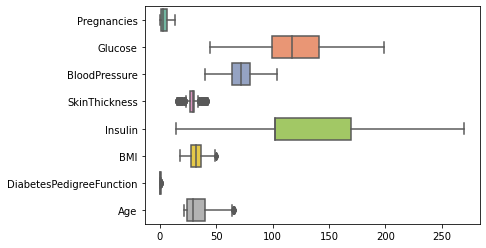

In [ ]:
import seaborn as sns
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(data=out2[datat], orient="h", palette="Set2")

In [ ]:
out2['mahala'] = mahalanobis(x=out2, data=out2)
out2.head()
outliers_indices = MD_detectOutliers(out2['mahala'],df)

print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [ 13  20  73 129 187 254 258 263 294 323 335 379 408 445 456 464 487 673
 679 744 747]



In [ ]:
len(outliers_indices)

21

##Scaling

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
datscale=NormalizeData(datmin2)

In [ ]:
datscale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501273,0.493930,0.240798,0.153550,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196529,0.123432,0.095554,0.107092,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.106370,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.106370,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.625806,0.571429,0.271739,0.186899,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Feature Selection

In [ ]:
datscale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667,0.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
5,0.294118,0.464516,0.510204,0.240798,0.106370,0.151329,0.052519,0.150000,0.0
7,0.588235,0.458065,0.493930,0.240798,0.106370,0.349693,0.023911,0.133333,0.0
10,0.235294,0.425806,0.693878,0.240798,0.106370,0.396728,0.048249,0.150000,0.0


In [ ]:
X=datscale[datat]
y=datscale[['Outcome']]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=4)
X_kbest = fvalue_selector.fit_transform(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_kbest

array([[0.26451613, 0.10637019, 0.17177914, 0.16666667],
       [0.29032258, 0.09615385, 0.20245399, 0.        ],
       [0.46451613, 0.10637019, 0.15132924, 0.15      ],
       ...,
       [0.94193548, 0.18689904, 0.35378323, 0.75      ],
       [0.81290323, 0.18689904, 0.52760736, 0.36666667],
       [0.52903226, 0.18689904, 0.24335378, 0.43333333]])

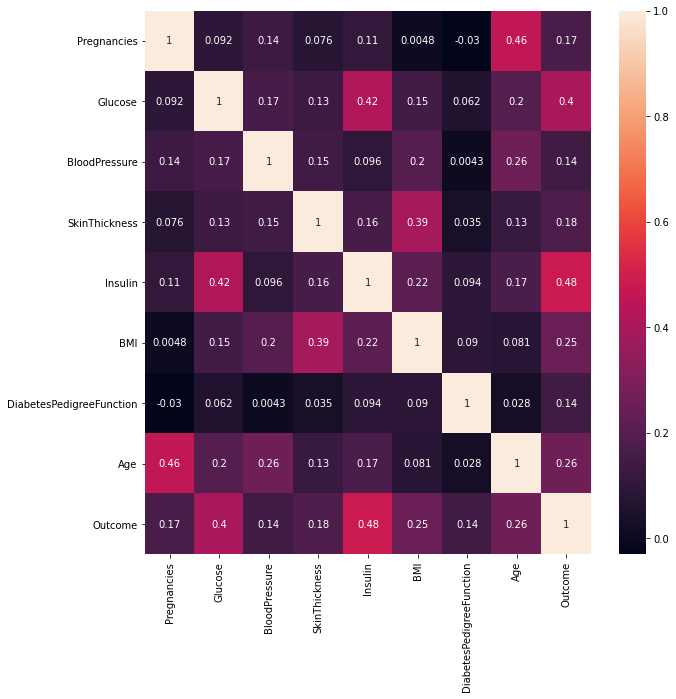

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = datscale.corr(method="kendall")
sns.heatmap(cor, annot=True)
plt.show()

#Split Training Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2,random_state=0)